In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
assets = ['PG', '^GSPC']
pf_data = pd.DataFrame()

for a in assets:
    pf_data[a] = wb.DataReader(a, data_source='yahoo', start = '2010-1-1')['Adj Close']

In [3]:
log_returns = np.log(pf_data / pf_data.shift(1))

In [6]:
# create random weights that equal 1
num_assets = len(assets)
weights = np.random.random(num_assets)
weights /= np.sum(weights)
weights[0] + weights[1]

1.0

In [8]:
folio_returns = []
folio_vols = []

for x in range (1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    folio_returns.append(np.sum(weights * log_returns.mean()) * 250)
    folio_vols.append(np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))))
    
folio_returns = np.array(folio_returns)
folio_vols = np.array(folio_vols)
folio_returns, folio_vols

(array([0.0840548 , 0.086523  , 0.08214765, 0.08275015, 0.09181367,
        0.0852413 , 0.09395923, 0.08568656, 0.084361  , 0.09286247,
        0.08123546, 0.08478602, 0.08614925, 0.08461746, 0.08850752,
        0.08096083, 0.08364042, 0.08953592, 0.08467011, 0.08972156,
        0.08853409, 0.08548547, 0.09184095, 0.0882926 , 0.08741795,
        0.08737705, 0.09094672, 0.08892803, 0.09122591, 0.08474219,
        0.08115957, 0.08831197, 0.08193829, 0.09196453, 0.08252052,
        0.08439333, 0.08676392, 0.08906042, 0.08429049, 0.09365021,
        0.07882751, 0.08609721, 0.08698209, 0.08704336, 0.08313122,
        0.08681987, 0.09426735, 0.09075983, 0.09125266, 0.08521142,
        0.08542741, 0.08661065, 0.08613084, 0.08438526, 0.07959981,
        0.09121262, 0.085599  , 0.0871871 , 0.08756528, 0.08676297,
        0.0817439 , 0.08589182, 0.0858603 , 0.0805978 , 0.08449522,
        0.08593775, 0.09068746, 0.08926263, 0.0828294 , 0.08674302,
        0.08104267, 0.08965121, 0.08581757, 0.09

Text(0, 0.5, 'Expected Return')

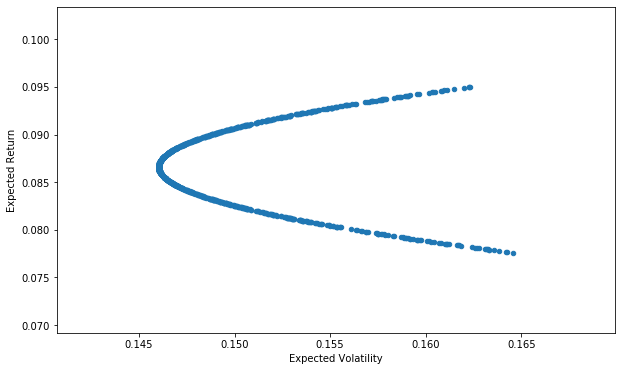

In [12]:
portfolios = pd.DataFrame({'Return': folio_returns, 'Volatility': folio_vols})
portfolios.plot(x='Volatility', y='Return', kind='scatter', figsize=(10,6))
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')